In [3]:
import json
import os

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data_path = "../phil__mfcc.json"
classes = os.listdir("D:\LICENTA\Philarmonia_equalised")
print(classes)
with open(data_path, "r") as fp:
        data = json.load(fp)

 # convert lists to numpy arrays
X = np.array(data["mfcc"])
y = np.array(data["labels"])
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

['banjo', 'bassoon', 'bass_clarinet', 'cello', 'clarinet', 'contrabassoon', 'cor_anglais', 'double_bass', 'flute', 'french_horn', 'guitar', 'mandolin', 'oboe', 'percussion', 'saxophone', 'trombone', 'trumpet', 'tuba', 'viola', 'violin']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                    random_state = 42)

print(X_train.shape)
print(y_train.shape)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

(10944, 130, 13, 1)
(10944,)


In [6]:
from keras.src.callbacks import ModelCheckpoint
from models.genre_first_models import CNNG1

model_wrapper = CNNG1(input_shape=input_shape, output_shape=len(classes))
model_wrapper.create_model()

checkpoint = ModelCheckpoint(filepath="../instrument_models/philarmonia_models/philarmonia_cnng1.keras", monitor='val_accuracy', verbose=1, mode="max", save_best_only=True,
                             save_weights_only=False)

history = model_wrapper.model.fit(X_train, y_train, epochs=30, batch_size=32, shuffle=True, validation_data=(X_test, y_test),
                        callbacks=[checkpoint])

model_wrapper.model.save("../instrument_models/philarmonia_models/philarmonia_cnng1.keras")

C:\Proiecte SSD\Licenta\Basic-Fourier-Usage\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 11, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 4, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 31, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 1, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,164 (180.33 KB)

 Trainable params: 45,972 (179.58 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
340/342 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1367 - loss: 3.0126
Epoch 1: val_accuracy improved from -inf to 0.43588, saving model to ../instrument_models/philarmonia_models/philarmonia_cnng1.keras
342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1374 - loss: 3.0093 - val_accuracy: 0.4359 - val_loss: 2.0193
Epoch 2/30
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4002 - loss: 1.9699
Epoch 2: val_accuracy improved from 0.43588 to 0.61308, saving model to ../instrument_models/philarmonia_models/philarmonia_cnng1.keras
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4003 - loss: 1.9695 - val_accuracy: 0.6131 - val_loss: 1.3777
Epoch 3/30
341/342 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5509 - loss: 1.4865
Epoch 3: val_accuracy improved from 0.61308 to 0.73548, saving model to ../instrument_models/philarmonia_models/philarmonia_cnng1.keras
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5510 - loss: 1.4860 - val_accuracy: 0.7355 - v

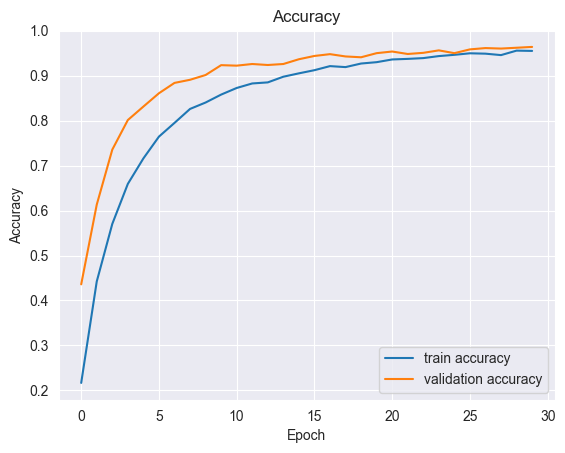

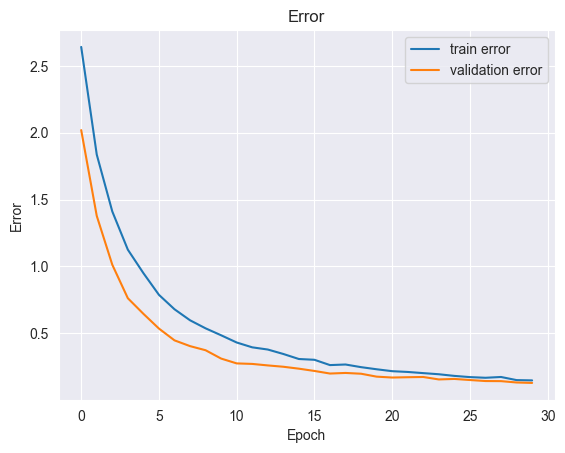

In [7]:
model_wrapper.plot_history(history)

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy :  0.9638290098648155
[19  2  7 ...  7  1  1]
[19  2  7 ...  7  1  1]


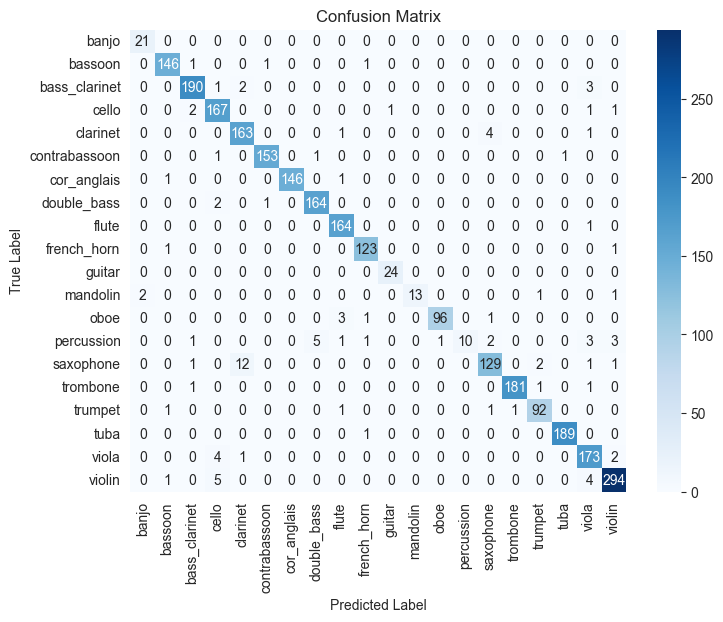

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [8]:
from keras.src.utils import to_categorical
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
import seaborn as sns
y_pred = model_wrapper.model.predict(X_test)

y_pred_f = []
for y_val in y_pred:
    l = np.argmax(y_val)
    y_pred_f.append(l)
y_pred_f = np.array(y_pred_f)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_f)
print("Accuracy : ", accuracy)
print(y_test)
print(y_pred_f)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_f)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Recall: ", recall_score(y_test, y_pred,average=None))
print("Precision: ", precision_score(y_test, y_pred,average=None))
print("F1-Score: ", f1_score(y_test, y_pred, average=None))